# Q2

Dado o Circuito abaixo, vamos encontrar o tensão no capacitor admitindo os parametros configurados no $RLC$ da imagem

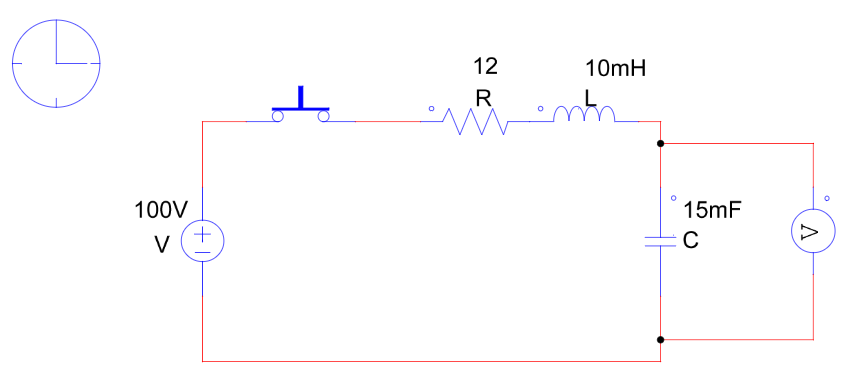

In [2]:
from IPython.display import Image
Image(filename='RLC.png')

Em $t = 0$  o botão se fecha e é aplicado ao circuito a tensão $V$. Já em $t>0$ podemos aplicar malhas de Kirchhoff  e podemos perceber que: 

$$Ri + L\frac{di}{dt}+ V_c = V$$



Como, no capacitor $$i = C\frac{dv}{dt}$$ 
podemos reduzir a equação e chegar a 
$$\frac{d^2v_c}{dt^2} + \frac{R}{L} \frac{dv_c}{dt} + \frac{v_c}{LC} = \frac{V}{LC}$$

Tendo a EDO de segunda ordem não homogênea formatada, sabemos que há uma solução particular somada a uma homogênea. 
$$v_c(t) = v_h(t) + v_p(t)$$
Sendo a solução homogênea a resposta natural do circuito, pois é como tivessemos desligado a fonte, e a solução particular da EDO é chamada de reposta forçada do circuito. 

Existe então três casos possíveis de resolução para essa EDO já conhecida, Caso de Superamortecido, Amortecimento Crítico e Subamortecido, cada um com uma resposta forçada diferente já conhecida pela literatura.



Quando $t \rightarrow \infty$ teremos já consolidado o regime permanente, e com isso o indutor se comportará como um curto-circuito e o capacitor como um circuito aberto, sendo assim para resposta natural $v_p(t) = v_c(\infty) =  V$

Primeiro passo para resolução no circuito simulado, é achar $$\alpha = \frac{R}{2L}$$ e $$\omega_0 = \frac{1}{\sqrt{LC}}$$

Para assim determinarmos o caso de resposta forçada.

In [11]:
from math import *
import sympy as sp

R = 12
L = 10e-3
C = 15e-3
V = 100

vp = V
vc = sp.Function("v_c")
vh = sp.Function("v_h")
t,a,w,A,B= sp.symbols("t alpha omega_0 A B")

a = R/(2*L)
w = 1/sp.sqrt(L*C)

print("a = {}, w = {} e vp(t) = {}".format(a,w,vp))



a = 600.0, w = 81.6496580927726 e vp(t) = 100


Como $\alpha > \omega_0$ estamos diante de um caso de Superamortecido que tem como resposta forçada $$v_h(t) = Ae^{r_1t} + Be^{r_2t}$$
uma vez que $r_{1,2} = - \alpha \pm \sqrt{\alpha^2-\omega_0^2}$

In [12]:
r1 = -a+sp.sqrt(a**2 - w**2)
r2 = -a-sp.sqrt(a**2 - w**2)

vh = lambda t: A*sp.exp(r1*t)+B*sp.exp(r2*t)
vh(t)

A*exp(-5.58151666243305*t) + B*exp(-1194.41848333757*t)

Uma vez que sabemos a reposta forçada, podemos compor a tesão no capacitor como $$v_c(t) = 100+ v_h(t)$$ 

In [13]:
vc = lambda t: vp + vh(t)
vc(t)

A*exp(-5.58151666243305*t) + B*exp(-1194.41848333757*t) + 100

Para $t<0$ a fonte de tesão estava desligada e o capacitor e o indutor sem energia armazenadas. Logo $v_c(0^-) = 0$ e $i_c(0^-) = 0$. Olhando para o capacitor podemos relembrar que a tensão sobre ele não pode variar instantaneamente logo $$v_c(0^-) = v_c(0^+)$$ aplicando essas deduções ficaremos com 

In [14]:
vc0 = vc(0)
vc0

A + B + 100

sabendo que a corrente no capacitor é $$i = C\frac{dv_c}{dt}$$ temos $$i(0^+) = C\frac{dv_c (0^+) }{dt} = 0$$ 
$$\frac{dv_c(0^+)}{dt} = 0$$
podemos então derivar $v_c(t)$  

In [15]:
dvc0 = vc(t).diff(t).subs(t,0)
dvc0

-5.58151666243305*A - 1194.41848333757*B

Então aplicando $t = 0^+$ temos um sistema linear composto por $A$ e $B$ 

In [16]:
ab=sp.solve_poly_system([dvc0, vc0], A, B)
A = ab[0][0]
B = ab[0][1]
print("A = {} e B = {}".format(A,B))

A = -100.469493868284 e B = 0.469493868283982


Logo equação geral para tensão no capacitor ficar 

In [18]:
vc(t)

100 + 0.469493868283982*exp(-1194.41848333757*t) - 100.469493868284*exp(-5.58151666243305*t)

derivando a tensão no capacitor podemos também fazer o gráfico de corrente uma vez que sabemos que:
$$i(t) = C\frac{dv_c}{dt}$$

In [19]:
i = lambda t: C*vc(t).diff(t)
i(t)

-8.41158231138063*exp(-1194.41848333757*t) + 8.41158231138063*exp(-5.58151666243305*t)

Plotando o gráfico e fazendo as comparações para com o circuito simulado no PSIM 

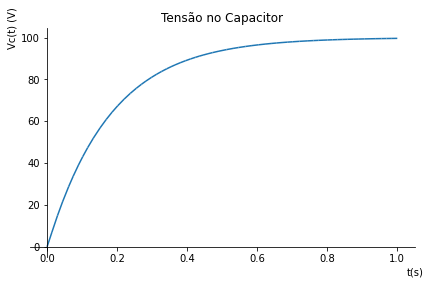

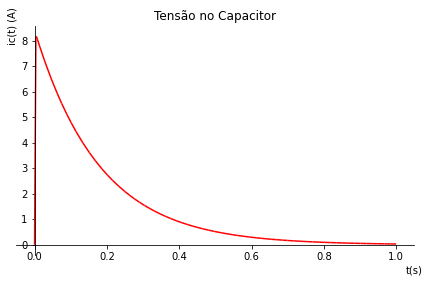

In [21]:
sp.plot(vc(t),(t,0,1),title= "Tensão no Capacitor", xlabel="t(s)", ylabel="Vc(t) (V)")
sp.plot(i(t),(t,0,1),title= "Tensão no Capacitor", xlabel="t(s)", ylabel="ic(t) (A)", line_color = "red")

No PSIM

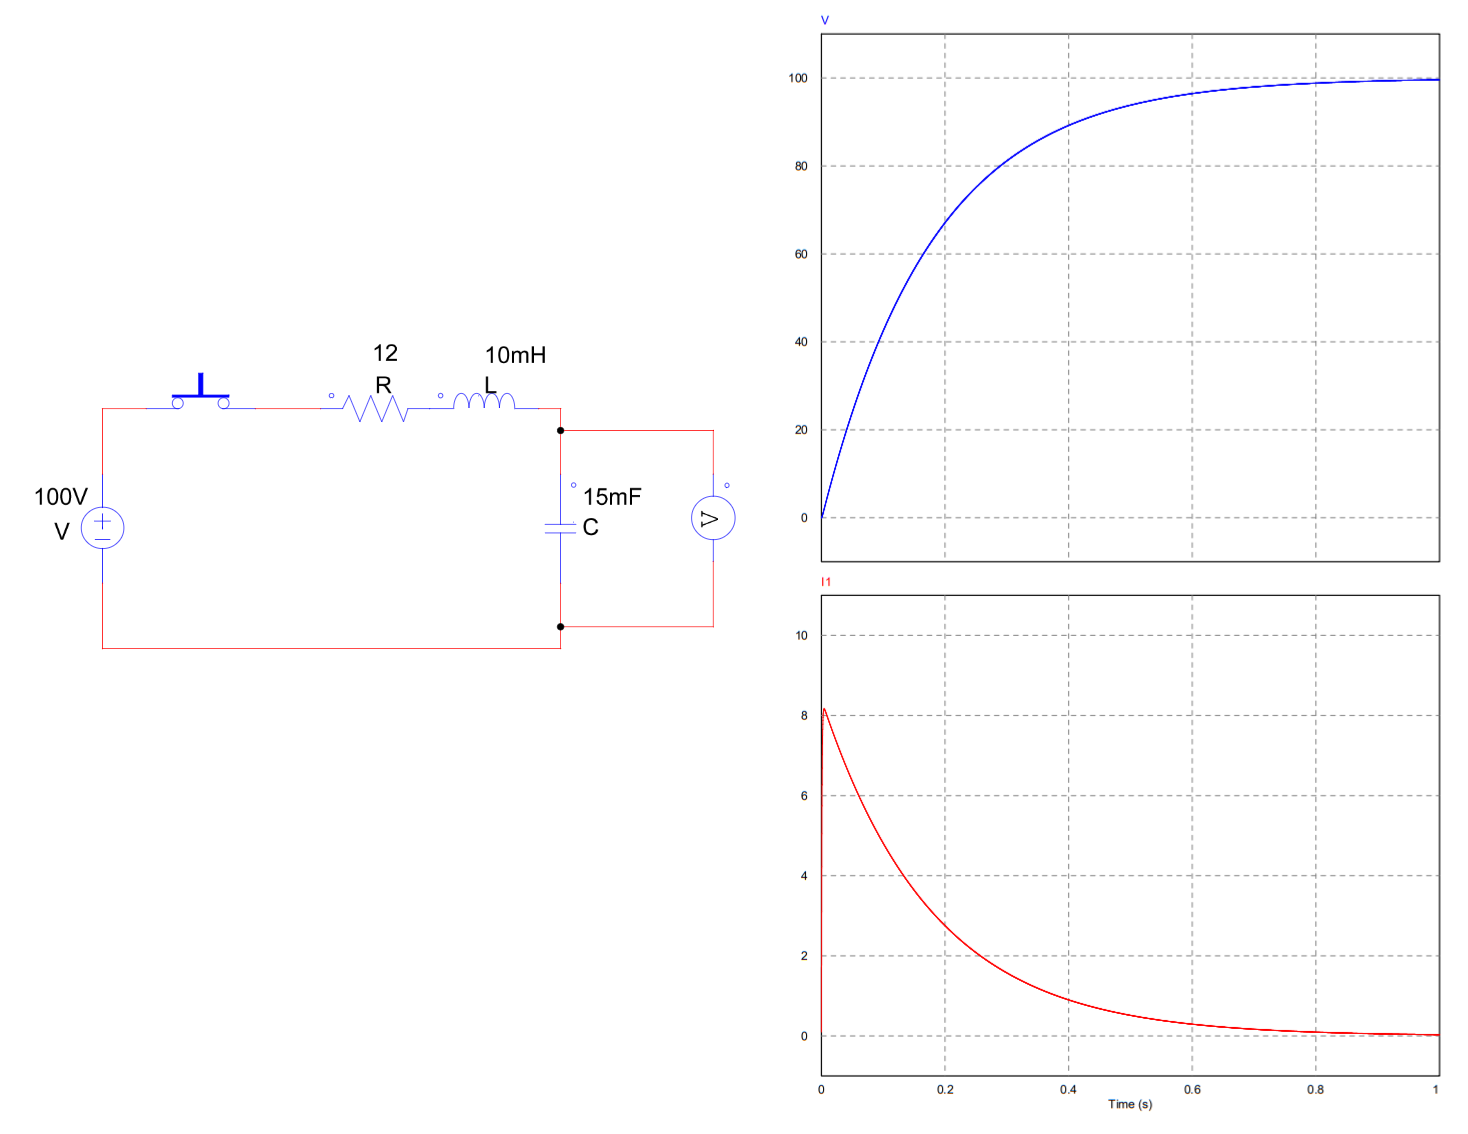

In [22]:
Image(filename='grafCircuito.png')

A esquerda o Circuito calculado usando python e a esquerda usando o simulador PSIM

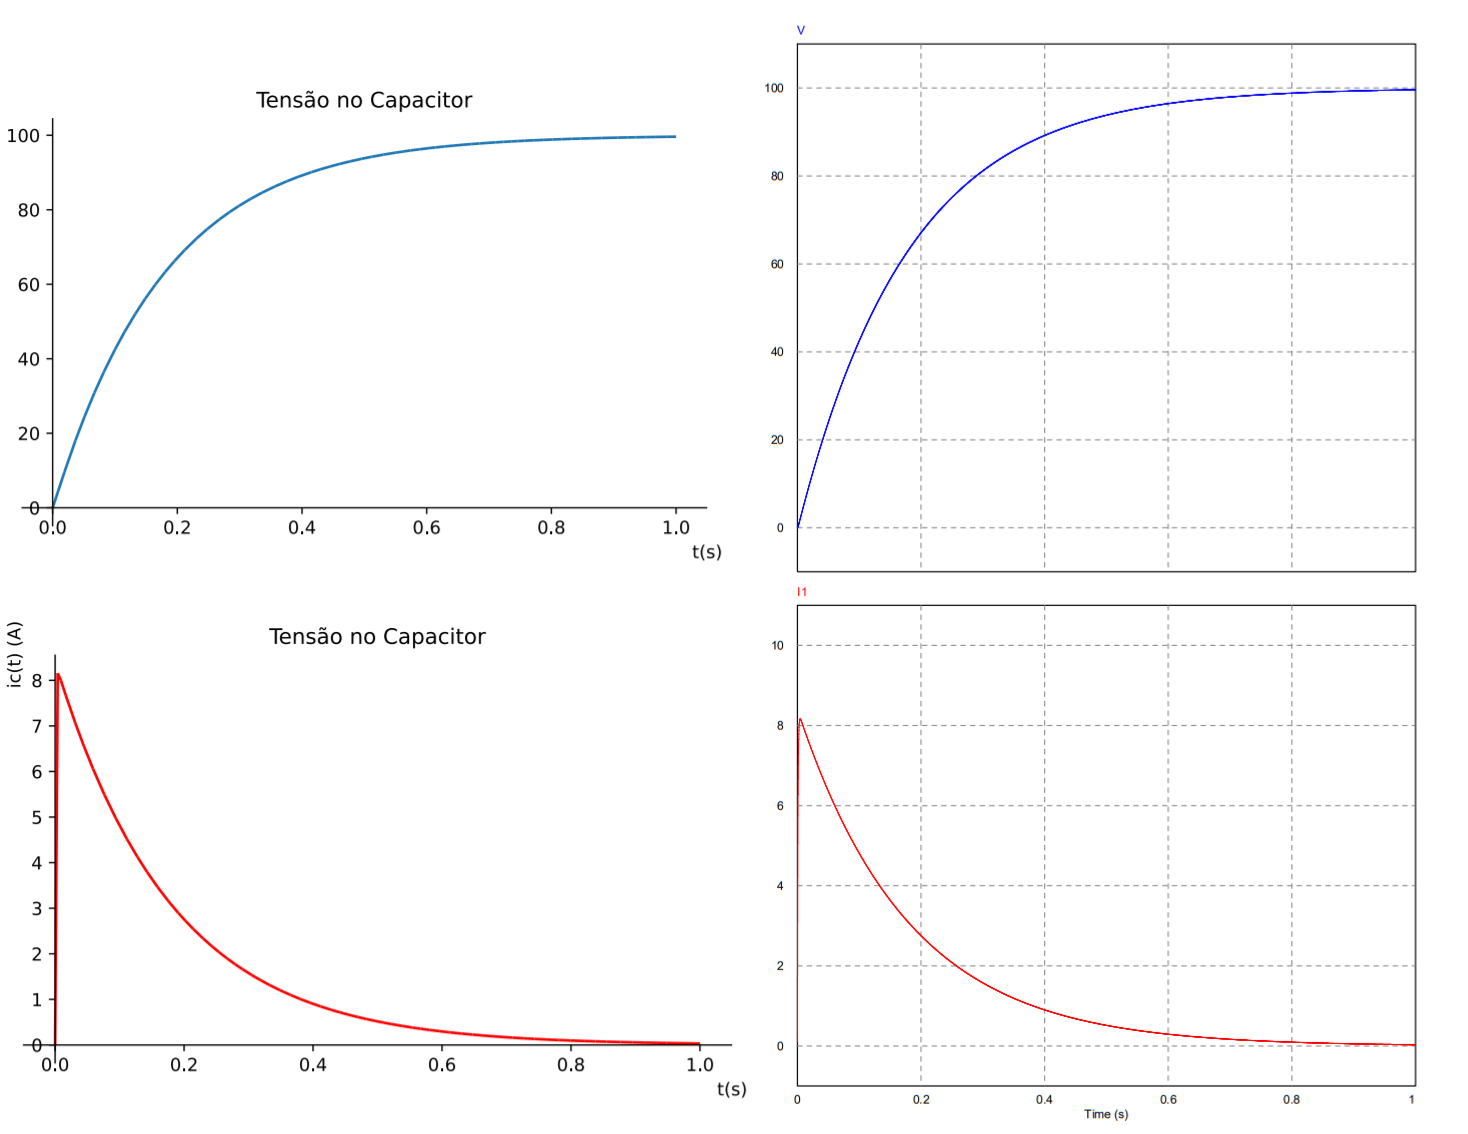

In [23]:
Image(filename='comparacao.png')